<a href="https://colab.research.google.com/github/ayundina/job_posts_analysis/blob/main/visualize_key_phrases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import ast

def str_to_dict(dict_str: str) -> dict:
  try:
    d = ast.literal_eval(dict_str)
  except Exception as e:
    print(f"Exception in string_to_dict - {e}")
    print(f"dict_str = {dict_str}")
    d = {}
  return d

In [6]:
import pandas as pd

def get_phrases_from_df(df: pd.DataFrame, col: str) -> list:
  list_of_str = df[col].tolist()
  list_of_dicts = [str_to_dict(key_phrases) for key_phrases in list_of_str]
  return list_of_dicts

In [4]:
import itertools
from collections import Counter, OrderedDict

def combine_requirements_by_topic(topic: str, key_requirements: list) -> OrderedDict:
  requirements = [req.get(topic) for req in key_requirements if req]
  requirements = list(itertools.chain(*requirements))
  counted = Counter(requirements)
  sorted = OrderedDict(counted.most_common(20))
  return sorted

#**Let's start here**
Turn csv file to pandas data frame

In [15]:
folder = "/content/drive/MyDrive/jobs"
file_to_read = "/processed_jobs.csv"

df = pd.read_csv(f"{folder}{file_to_read}")
n_rows = df.shape[0]
df.head(n_rows)

,title,company_name,location,description,key_requirements
0,Graduate Data Scientist,Optiver,"Amsterdam, Netherlands",Can you solve this puzzle?\n\nAn ant leaves it...,"Sure, here is the solution to the puzzle quest..."
1,Process Data Scientist,FrieslandCampina,"Amersfoort, Netherlands",• Work with stakeholders (supply chain experts...,"Based on the job description provided, here is..."
2,Data Scientist,felyx,"Amsterdam, Netherlands",Company Description\n\nWith the intensifying t...,"{'EDU': {'masters', 'bachelors'}, 'EXP': {'2+'..."
3,Data Scientist,Adyen,"Amsterdam, Netherlands","This is Adyen\n\nAdyen provides payments, data...","{'EDU': {}, 'EXP': {'3+'}, 'TOOL': {'spark', '..."
4,Data Scientist,HEINEKEN,"Amsterdam, Netherlands",Data Scientist\n\nThe mission of Global Analyt...,"{'EDU': {'msc', 'phd'}, 'EXP': {'3-5'}, 'TOOL'..."
...,...,...,...,...,...
154,PhD position: Predicting radiotherapy outcome ...,University Medical Centre Groningen (UMCG),"Groningen, Netherlands",Radiotherapy is an important treatment modalit...,"{'EDU': {'phd'}, 'EXP': {}, 'TOOL': {'proton t..."
155,"Internship: Computer Science, Robotics, Comput...",Lely,"Maassluis, Netherlands",Job DescriptionAre you following a degree in C...,"{'EDU': {'university'}, 'EXP': {}, 'TOOL': {'o..."
156,Data Scientist Artificial Intelligence ervarin...,CareerValue,"Amersfoort, Netherlands",Voor een toffe consultancy bedrijf die het geb...,"{'EDU': {'bsc', 'master', 'msc'}, 'EXP': {'2-3..."
157,PhD position on Hybrid argumentation using lar...,Vrije Universiteit Amsterdam VU,"Amsterdam, Netherlands",A 4-year full-time Ph.D. student position is a...,"{'EDU': {'phd', 'msc', 'computer science', 'ar..."


Convert strings to dictionaries and group key phrases by topic

In [16]:
import operator
from collections import Counter, OrderedDict

key_phrases = get_phrases_from_df(df, "key_requirements")
edu = combine_requirements_by_topic("EDU", key_phrases)
exp = combine_requirements_by_topic("EXP", key_phrases)
tech = combine_requirements_by_topic("TECH", key_phrases)
tool = combine_requirements_by_topic("TOOL", key_phrases)

Exception in string_to_dict - invalid syntax (<unknown>, line 1)
dict_str = Sure, here is the solution to the puzzle questions:
Exception in string_to_dict - invalid syntax (<unknown>, line 1)
dict_str = Based on the job description provided, here is the extracted entity information:
Exception in string_to_dict - '{' was never closed (<unknown>, line 1)
dict_str = {'EDU': {'masters', 'bachelors'}, 'EXP': {'2+'}, 'TOOL': {'python'}, 'TECH': {'data science', 'operations research', 
Exception in string_to_dict - '{' was never closed (<unknown>, line 1)
dict_str = {'EDU': {'msc'},
Exception in string_to_dict - invalid syntax (<unknown>, line 1)
dict_str = Based on the job description provided, here is the extracted entity information:
Exception in string_to_dict - '{' was never closed (<unknown>, line 1)
dict_str = {'EDU': {'undergraduate degree', 'master\'s degree'},
Exception in string_to_dict - '{' was never closed (<unknown>, line 1)
dict_str = {'EDU': {'phd', 'msc'},
Exception in stri

In [17]:
import matplotlib.pyplot as plt

def set_color(ax: plt.axes, color: str) -> None:
  ax.xaxis.label.set_color(color)
  ax.tick_params(axis='x', colors=color)
  ax.tick_params(axis='y', colors=color)
  ax.spines['bottom'].set_color(color)
  ax.spines['top'].set_color(color)
  ax.spines['right'].set_color(color)
  ax.spines['left'].set_color(color)

def set_subplt(ax: plt.axes, x: list, y: list, title: str) -> None:
  color = 'grey'
  bar_color = 'lightgrey'
  ax.bar(x, y, color=bar_color)
  ax.set_title(title, color=color)
  plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
  set_color(ax, color)

#**Finally! It's time to plot**

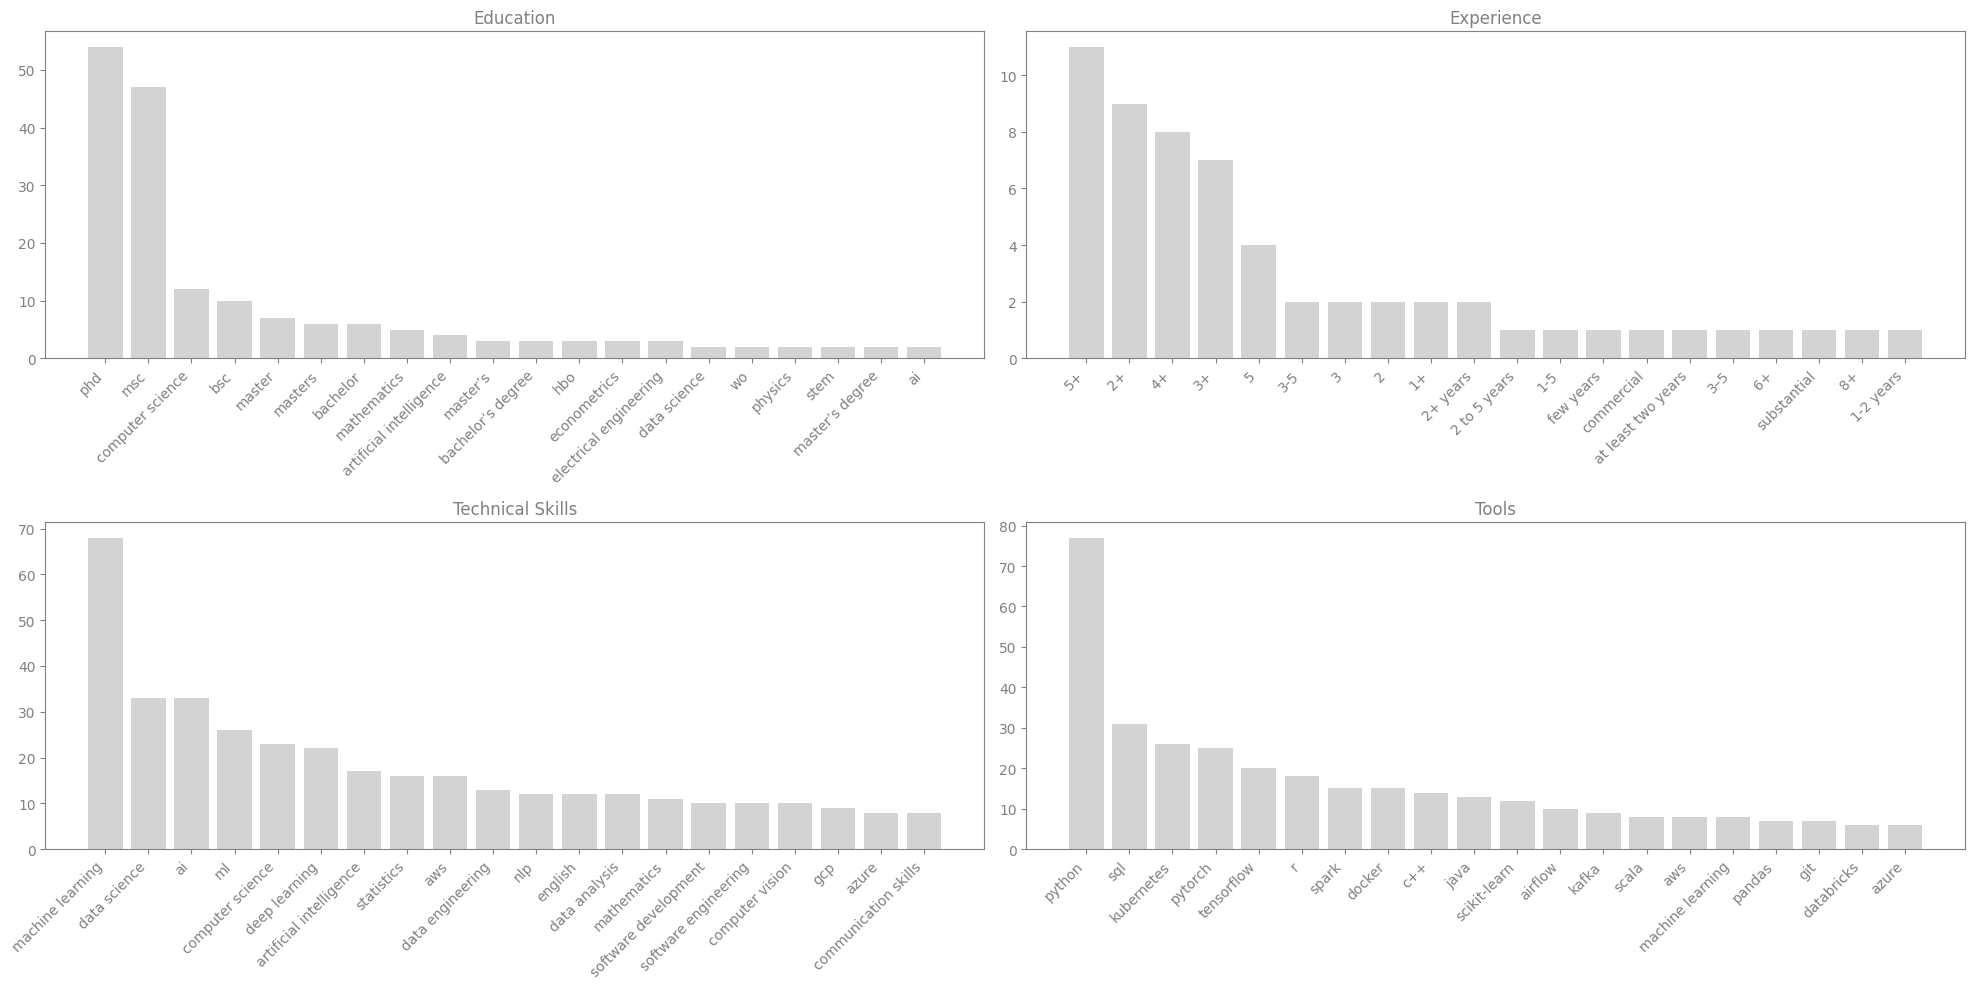

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

set_subplt(ax1, list(edu.keys()), list(edu.values()), "Education")
set_subplt(ax2, list(exp.keys()), list(exp.values()), "Experience")
set_subplt(ax3, list(tech.keys()), list(tech.values()), "Technical Skills")
set_subplt(ax4, list(tool.keys()), list(tool.values()), "Tools")

plt.tight_layout()
plt.show()